# Лабораторная работа 4

**Импорт библиотек**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from scipy.stats import shapiro
from itertools import combinations
from sklearn.metrics import r2_score
from statsmodels.formula.api import ols

**Задание №1**

По данным файла «dataset_11508_12.txt» постройте линейную регрессию, где - первая переменная - зависимая, вторая - независимая. В ответе выведите значения регрессионных коэффициентов  intercept и  slope.

In [2]:
data_11508 = pd.read_csv('info-folder/data/dataset_11508_12.txt', sep=" ", header=None, names=["dependent", "independent"])

data_11508.head()

,dependent,independent
0,0.435,1.868
1,0.563,1.294
2,1.699,-3.824
3,-0.894,7.856
4,1.296,-2.008


In [3]:
X = data_11508["independent"].values.reshape(-1, 1)  # Independent variable
y = data_11508["dependent"].values  # Dependent variable

# Построение модели линейной регрессии
model = LinearRegression()
model.fit(X, y)

# Извлечение коэффициентов
intercept = model.intercept_
slope = model.coef_[0]

(intercept, slope)

(np.float64(0.8500427888479712), np.float64(-0.22204361509119652))

В линейной регрессии уравнение имеет вид: y = intercept + slope * x

где:
- \(y\) — это зависимая переменная (то есть та, которую мы пытаемся предсказать).
- \(x\) — это независимая переменная (то есть фактор, который влияет на \(y\)).
- **Intercept** — значение \(y\), когда \(x = 0\). Это "начальная точка" линии регрессии на оси \(y\).
- **Slope** — наклон линии регрессии, который показывает, как изменяется \(y\) при изменении \(x\) на единицу.

В нашем случае:
- **Intercept = 0.850** означает, что если независимая переменная (\(x\)) равна 0, то ожидаемое значение зависимой переменной (\(y\)) равно 0.850.
- **Slope = -0.222** означает, что при увеличении независимой переменной (\(x\)) на 1 единицу значение зависимой переменной (\(y\)) уменьшается на 0.222.

#### Интерпретация
- Регрессия показывает отрицательную связь между независимой (\(x\)) и зависимой (\(y\)) переменными. Это значит, что при росте независимой переменной, зависимая переменная уменьшается.
- Значение intercept показывает точку пересечения регрессионной прямой с осью \(y\), то есть начальное значение зависимой переменной, если влияние независимой отсутствует. 


**Задание №2**

Воспользуемся уже знакомыми данными diamonds. Только для бриллиантов класса Ideal (переменная cut) c числом карат равным 0.46 (переменная carat) постройте линейную регрессию, где в качестве зависимой переменной выступает price, в качестве предиктора - переменная  depth. Сохраните коэффициенты регрессии в переменную fit_coef.
!!!Это задание нужно решить, не используя цикл for().

In [4]:
diamonds = pd.read_csv("info-folder/data/diamonds.csv")

diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
# Фильтруем данные
filtered_data = diamonds[(diamonds['cut'] == 'Ideal') & (diamonds['carat'] == 0.46)]

# Определите зависимые (цена) и независимые (глубина) переменные
X = filtered_data['depth'].values.reshape(-1, 1)
y = filtered_data['price']

# Построение модели линейной регрессии
model = LinearRegression()
model.fit(X, y)

# Извлечение коэффициентов
fit_coef = (model.intercept_, model.coef_[0])
fit_coef

(np.float64(-76.11030176901568), np.float64(21.43426985778743))

Коэффициенты регрессии для модели:

- Intercept: -76.11
- Slope: 21.43

Это означает, что для diamonds класса "Ideal" с каратом 0,46 цена увеличивается примерно на 21,43 единицы при увеличении глубины на одну единицу.

**Задание №3**

Напишите функцию fill_na, которая принимает на вход данные с тремя переменными:

- x_1  -  числовой вектор

- x_2 - числовой вектор
- y - числовой вектор с пропущенными значениями.

На первом этапе, используя только наблюдения, в которых нет пропущенных значений, мы построим регрессионную модель (без взаимодействий), где  y — зависимая переменная, x_1 и x_2 —
независимые переменные. Затем, используя построенную модель, мы заполним пропущенные значения предсказаниями модели.

Функция должна возвращать dataframe c новой переменной  y_full. Сохраните в нее переменную y, в которой пропущенные значения заполнены предсказанными значениями построенной модели.

   x_1 x_2  y   y_full
1   9  22 14 14.00000
2  14  35  9  9.00000
3  10  45 NA 13.12727
4  6  35 NA 13.30132
5 11  36 16 16.00000
6  5  27 11 11.00000
7  9  34 NA 12.83632
8  6  25 NA 12.90783
9 11  38 13 13.00000
10 12  23 NA 11.97784


In [6]:
def fill_na(x_1, x_2, y):
    # Объединение входных данных в DataFrame
    data = pd.DataFrame({'x_1': x_1, 'x_2': x_2, 'y': y})
    
    # Отдельные строки с пропущенными значениями в y и без них
    data_complete = data.dropna(subset=['y'])
    data_missing = data[data['y'].isna()]
    
    # Извлечение функций и целей для подгонки модели
    X_train = data_complete[['x_1', 'x_2']]
    y_train = data_complete['y']
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Прогнозирование отсутствующих значений y
    if not data_missing.empty:  # Смотрим, что есть недостающие значения для прогнозирования
        X_missing = data_missing[['x_1', 'x_2']]
        y_pred = model.predict(X_missing)
        data.loc[data['y'].isna(), 'y'] = y_pred
    
    # Создаем новый столбец с заполненными значениями
    data['y_full'] = data['y']
    
    return data

In [7]:
example_data = {
    "x_1": [9, 14, 10, 6, 11, 5, 9, 6, 11, 12],
    "x_2": [22, 35, 45, 35, 36, 27, 34, 25, 38, 23],
    "y": [14, 9, np.nan, np.nan, 16, 11, np.nan, np.nan, 13, np.nan]
}

# Apply the function
result = fill_na(example_data['x_1'], example_data['x_2'], example_data['y'])
result

,x_1,x_2,y,y_full
0,9,22,14.000000,14.000000
1,14,35,9.000000,9.000000
2,10,45,13.127271,13.127271
3,6,35,13.301318,13.301318
4,11,36,16.000000,16.000000
5,5,27,11.000000,11.000000
6,9,34,12.836320,12.836320
7,6,25,12.907833,12.907833
8,11,38,13.000000,13.000000
9,12,23,11.977836,11.977836


**Задание №4**

В переменной df сохраните subset данных mtcars только с переменными "wt", "mpg", "disp", "drat", "hp". Воспользуйтесь множественным регрессионным анализом, чтобы предсказать вес машины (переменная "wt"). Выберите такую комбинацию независимых переменных (из "mpg", "disp", "drat", "hp"), чтобы значение R^2 adjusted было наибольшим. Взаимодействия факторов учитывать не надо. 

In [8]:
mtcars = pd.read_csv("info-folder/data/mtcars.csv")

mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [9]:
# Подмножество релевантных переменных
df = mtcars[['wt', 'mpg', 'disp', 'drat', 'hp']]

# Подготовка зависимой переменной
y = df['wt']

# Инициализация переменных для хранения информации о наилучшей модели
best_r2_adj = -np.inf
best_model = None
best_features = None

# Перебор всех комбинаций независимых переменных
independent_vars = ['mpg', 'disp', 'drat', 'hp']
for r in range(1, len(independent_vars) + 1):
    for combination in combinations(independent_vars, r):
        X = df[list(combination)]
        model = LinearRegression().fit(X, y)
        
        # Рассчет R^2 и корректировка R^2
        r2 = r2_score(y, model.predict(X))
        n = len(y)
        p = len(combination)
        r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)
        
        # Обновляем лучшую модель, если эта лучше
        if r2_adj > best_r2_adj:
            best_r2_adj = r2_adj
            best_model = model
            best_features = combination

best_features, best_r2_adj

(('mpg', 'disp', 'hp'), 0.8428135873200833)

Наилучшая комбинация независимых переменных для прогнозирования веса автомобиля («wt») с наибольшей корректировкой \(R^2\) это:

- **Independent variables**: `mpg`, `disp`, `hp`
- **Adjusted \(R^2\)**: 0.843

**Задание №5**

Напишите функцию normality_test, которая получает на вход dataframe с количественными переменными, проверяет распределения каждой переменной на нормальность с помощью теста Шапиро-Уилка. Функция должна возвращать вектор со значениями p - value, полученного в результате проверки на нормальность каждой переменной. Названия элементов вектора должны совпадать с названиями переменных. 
Пример работы функции:
> normality_test(mtcars[,1:6])
   mpg         cyl         disp           hp         drat           wt 
1.228814e-01 6.058338e-06 2.080657e-02 4.880824e-02 1.100608e-01 9.265499e-02 
> normality_test(iris[,-5])
Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
1.018116e-02 1.011543e-01 7.412263e-10 1.680465e-08 
Опять же, обратите внимание функция должна работать корректно с различным количеством переменных и в независимости от их названий.


In [10]:
def normality_test(dataframe):
    """
    Выполнение теста Шапиро-Уилка на нормальность для каждой числовой переменной в кадре данных.
    
    Args:
    dataframe (pd.DataFrame): DataFrame содержащие числовые переменные.
    
    Returns:
    dict: Словарь с именами переменных в качестве ключей и p-значениями в качестве значений.
    """
    p_values = {}
    for column in dataframe.columns:
        # Тест Шапиро-Уилка
        stat, p_value = shapiro(dataframe[column])
        p_values[column] = p_value
    return p_values


In [11]:
# Пример применения к набору данных mtcars (выбор числовых столбцов)
numerical_data = mtcars.select_dtypes(include=['float64', 'int64'])
result = normality_test(numerical_data)
result

{'mpg': np.float64(0.12288135948636324),
 'cyl': np.float64(6.05833817116411e-06),
 'disp': np.float64(0.020806569786411037),
 'hp': np.float64(0.048808238192921294),
 'drat': np.float64(0.11006075811042491),
 'wt': np.float64(0.09265498967400623),
 'qsec': np.float64(0.5935176484819367),
 'vs': np.float64(9.737375787054182e-08),
 'am': np.float64(7.836354547253464e-08),
 'gear': np.float64(1.306843771257444e-05),
 'carb': np.float64(0.00043824049515876334)}

In [12]:
iris = sns.load_dataset("iris")
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [13]:
p_values_iris = normality_test(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
p_values_iris

{'sepal_length': np.float64(0.010181161454691156),
 'sepal_width': np.float64(0.10115426916130241),
 'petal_length': np.float64(7.412263135173159e-10),
 'petal_width': np.float64(1.6804652103149898e-08)}

Реализована функция `normality_test`. Для предоставленного набора данных приведены p-значения, полученные в результате проверки нормальности по Шапиро-Уилку для каждой числовой переменной:

- **mpg**: 0.1229
- **cyl**: 6.058e-06
- **disp**: 0.0208
- **hp**: 0.0488
- **drat**: 0.1101
- **wt**: 0.0927
- **qsec**: 0.5935
- **vs**: 9.737e-08
- **am**: 7.836e-08
- **gear**: 1.307e-05
- **carb**: 0.0004

**Задание №6**

Напишите функцию resid_norm, которая тестирует распределение остатков от модели на нормальность при помощи теста Шапиро-Уилка и создает гистограмму с красной заливкой "red", если распределение остатков значимо отличается от нормального (p < 0.05), и с зелёной заливкой "green" - если распределение остатков значимо не отличается от нормального.
На вход функция получает регрессионную модель. Функция возвращает переменную, в которой сохранен график гистограммы.



In [14]:
import matplotlib.pyplot as plt

def resid_norm(model):
    """
    Проверка нормальность остатков регрессионной модели с помощью теста Шапиро-Уилка 
    и создание гистограммы остатков с разными цветами заливки в зависимости от результатов теста.
    
    Args:
    model (LinearRegression): Подогнанная модель линейной регрессии.
    
    Returns:
    plt.Figure: Рисунок matplotlib, содержащий гистограмму остатков.
    """
    # Вычисление остатков
    residuals = model._y - model.predict(model._X) 
    
    # Shapiro-Wilk test
    stat, p_value = shapiro(residuals)
    
    # Определите цвет заливки на основе значения p-value
    fill_color = "red" if p_value < 0.05 else "green"
    
    # Создание гистограммы
    fig, ax = plt.subplots()
    ax.hist(residuals, bins=20, color=fill_color, edgecolor="black")
    ax.set_title("Histogram of Residuals")
    ax.set_xlabel("Residuals")
    ax.set_ylabel("Frequency")
    return fig


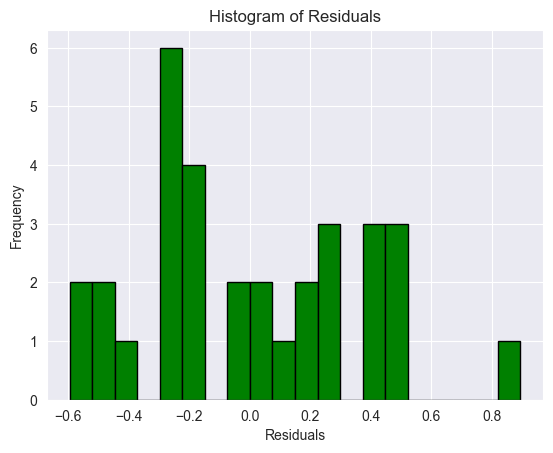

In [15]:
# Пример использования: Настройка модели линейной регрессии
X_example = mtcars[['mpg', 'disp', 'hp']]  # Пример независимых переменных
y_example = mtcars['wt']  # Зависимая переменная
model1 = LinearRegression().fit(X_example, y_example)

# Сохранение X и y в модели для вычисления остатков
model1._X = X_example
model1._y = y_example

# Генерация гистограммы
histogram1 = resid_norm(model1)
plt.show()

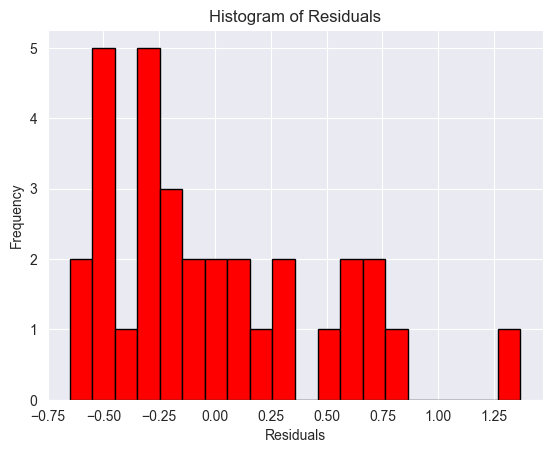

In [16]:
# Пример использования: Настройка модели линейной регрессии
X_example = mtcars[['mpg']]  # Пример независимых переменных
y_example = mtcars['wt']  # Зависимая переменная
model2 = LinearRegression().fit(X_example, y_example)

# Сохранение X и y в модели для вычисления остатков
model2._X = X_example
model2._y = y_example

# Генерация гистограммы
histogram2 = resid_norm(model2)
plt.show()

**Задание №7**

Ещё одной проблемой регрессионных моделей может стать мультиколлинеарность - ситуация, когда предикторы очень сильно коррелируют между собой. Иногда корреляция между двумя предикторами может достигать 1, например, когда два предиктора - это одна и та же переменная, измеренная в разных шкалах (x1 - рост в метрах, x2 - рост в сантиметрах)  
Проверить данные на мультиколлинеарность можно по графику pairplot и посчитав корреляцию между всеми предикторами c помощью корреляции.
Напишите функцию high_corr, которая принимает на вход датасет с произвольным числом количественных переменных и возвращает вектор с именами двух переменных с максимальным абсолютным значением коэффициента корреляции .
Примеры работы функции:
> high_corr(swiss)
[1] "Examination" "Education"
> high_corr(iris[,-5])
[1] "Petal.Length" "Petal.Width"


In [17]:
def high_corr(dataframe):
    """
    Определение двух переменных в наборе данных с наибольшей абсолютной корреляцией.

    Args:
    dataframe (pd.DataFrame): Набор данных, содержащий числовые переменные.

    Returns:
    tuple: Кортеж с именами двух переменных с наибольшей абсолютной корреляцией.
    """
    # Вычисление корреляционной матрицы
    corr_matrix = dataframe.corr().abs()
    
    # Ставим диагональ на 0, чтобы игнорировать самокорреляцию
    np.fill_diagonal(corr_matrix.values, 0)
    
    # Поиск индекса максимальной корреляции
    max_corr = corr_matrix.unstack().idxmax()
    
    return max_corr

In [18]:
numerical_data = mtcars.select_dtypes(include=['float64', 'int64'])
result = high_corr(numerical_data)
result

('cyl', 'disp')

In [19]:
high_corr(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

('petal_length', 'petal_width')

**Задание №8**

Используем данные mtcars. Сохраните в переменную логистическую регрессионную модель, где в качестве зависимой переменной выступает тип коробки передач (am), в качестве предикторов переменные disp, vs, mpg.
Значения коэффициентов регрессии сохраните в переменную log_coef.


In [20]:
# Определение зависимых и независимых переменных для логистической регрессии
X_log = mtcars[['disp', 'vs', 'mpg']]  # Независимые переменные
y_log = mtcars['am']  # Зависимая переменная (тип передачи)

# Модель логистической регрессии 
log_model = LogisticRegression()
log_model.fit(X_log, y_log)

# Извлечение коэффициентов регрессии
log_coef = np.hstack((log_model.intercept_, log_model.coef_.flatten()))
log_coef

array([-1.28472745, -0.01116693, -1.31506492,  0.1906281 ])

В логистической регрессии коэффициенты интерпретируются с точки зрения их влияния на лог-вероятность (логарифм отношения шансов) зависимой переменной. Модель имеет вид:

log(P(y=1)) = B0+B1*x1+B2*x2+B3*x3

где:
- \(P(y=1)\) — вероятность, что зависимая переменная \(y = 1\) (например, автоматическая коробка передач).
- \(\B0\) — **intercept** (сдвиг, значение лог-шансов при всех \(xi = 0\)).
- \(\B1, \B2, \B3\) — коэффициенты для предикторов (\(x1, x2, x3\)).

### Конкретные значения:
1. **Intercept (-1.285)**:
   - Это базовое значение лог-шансов для автоматической коробки передач, когда все независимые переменные равны нулю.
   - Если \(x_1 = x_2 = x_3 = 0\), лог-шансы равны -1.285, что соответствует вероятности автоматической коробки передач меньше 50%.

2. **disp (-0.011)**:
   - При увеличении объема двигателя (\(disp\)) на 1 единицу, лог-шансы автоматической коробки передач уменьшаются на 0.011.
   - Это означает, что большие двигатели (в кубических дюймах) слегка уменьшают вероятность автоматической коробки передач.

3. **vs (-1.315)**:
   - Если двигатель изменяет конфигурацию с одной (например, V-образной) на другую (например, рядный), лог-шансы автоматической коробки передач уменьшаются на 1.315.
   - Это значительное снижение, указывающее на сильную связь между типом двигателя и коробкой передач.

4. **mpg (0.191)**:
   - При увеличении расхода топлива (миль на галлон, \(mpg\)) на 1 единицу, лог-шансы автоматической коробки передач увеличиваются на 0.191.
   - Это означает, что более экономичные машины с большей вероятностью будут иметь автоматическую коробку передач.
